### FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

### 1 Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2 Load Dataset

In [5]:
data=pd.read_csv("C:\\Users\\bilad\\ExcelR\\Assignments\\Datasets\\exchange_rate.csv")
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


### 3 EDA and Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [8]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [11]:
data.dtypes

date        object
Ex_rate    float64
dtype: object

In [12]:
# Work only with 'date' and 'Ex_Rate'
exchange_rate=data[['date', 'Ex_rate']].copy()

#convert 'date' to datetime
exchange_rate['date']=pd.to_datetime(exchange_rate['date'], format='%d-%m-%Y %H:%M').dt.normalize()
exchange_rate.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [13]:
# set 'date' as index
exchange_rate.set_index('date', inplace=True)
exchange_rate.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [14]:
exchange_rate.isnull().sum()

Ex_rate    0
dtype: int64

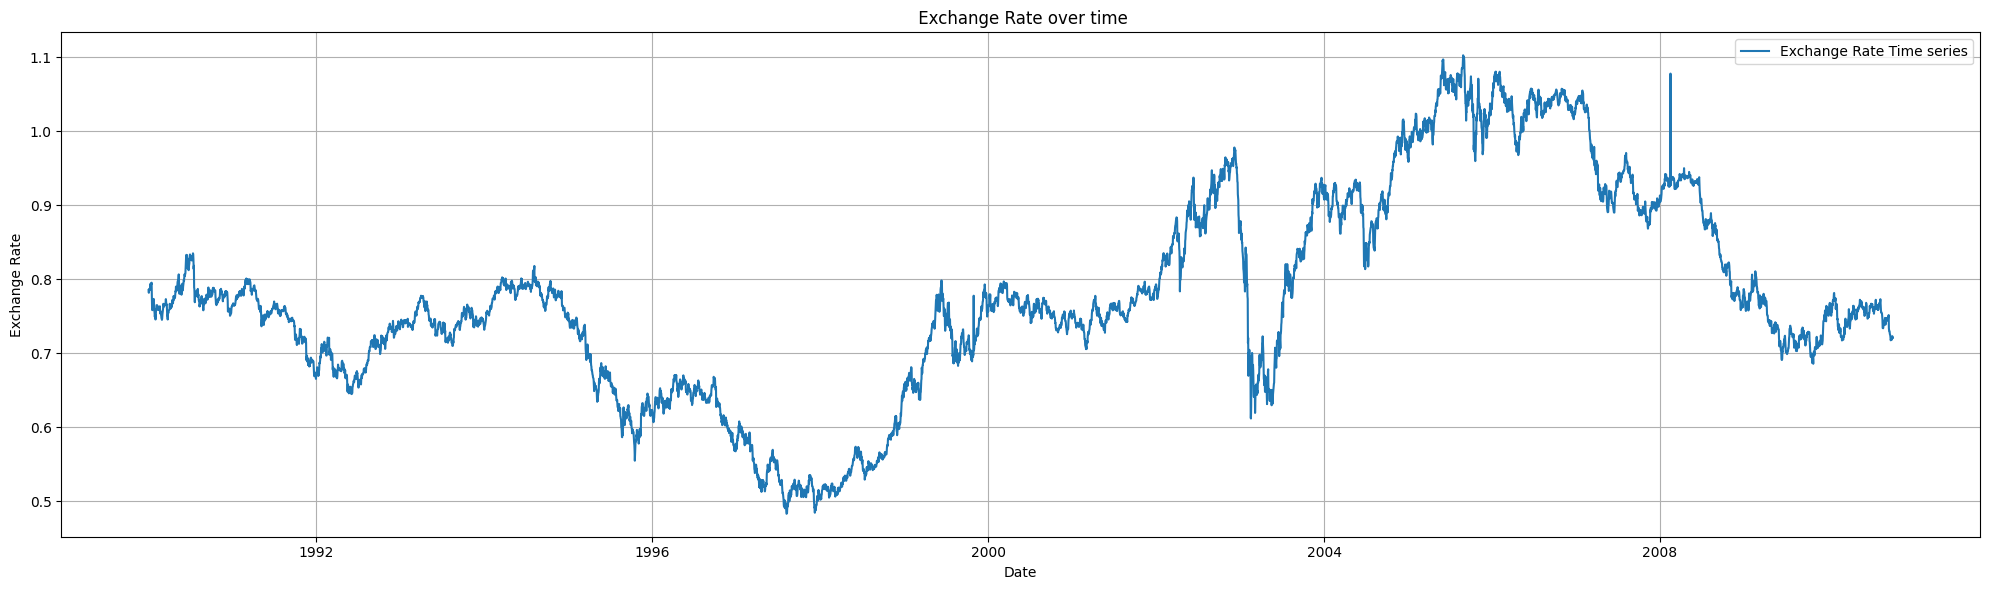

In [15]:
# plot Exchange rate over time
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(exchange_rate, label='Exchange Rate Time series')
plt.title(' Exchange Rate over time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result =adfuller(series)
    return {
        'ADF Statistic': result[0],
        'P-value': result[1],
        'Critical Values': result[4]
    }

# Run ADF  Test on original data
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result =adfuller(series)
    return {
        'ADF Statistic': result[0],
        'P-value': result[1],
        'Critical Values': result[4]
    }

# Run ADF  Test on original data
adf_result_original=adf_test(exchange_rate['Ex_rate'])
adf_result_original

{'ADF Statistic': -1.6649941807381343,
 'P-value': 0.44923273535979974,
 'Critical Values': {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108}}

##### Conclusion: The Exchange rate (USD-AUC) is non-stationary
- p-value(0.449)>0.05
- we fail to reject null hyposthesis.

- H0: Data is non stationary    if p value > 0.05
- H1: Data is stationary. if p values<0.05

   

In [18]:
# So Now make exchange rate statinary by differencing
exchange_diff=exchange_rate['Ex_rate'].diff().dropna()
exchange_diff.head()

date
1990-01-02   -0.0037
1990-01-03    0.0049
1990-01-04   -0.0007
1990-01-05   -0.0011
1990-01-06    0.0017
Name: Ex_rate, dtype: float64

In [19]:
#Rerun ADF test on differencing data
adf_result_diff=adf_test(exchange_diff)
adf_result_diff

{'ADF Statistic': -99.39343120118627,
 'P-value': 0.0,
 'Critical Values': {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108}}

Conclusion :
- p-value(0.00)<0.05 -> We reject the null hypothesis.
- The  differenced exchange rate is stationary now
- Now, the series is ready to fit models.

In [21]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(exchange_diff, nlags=20)
lag_pacf=pacf(exchange_diff, nlags=20)

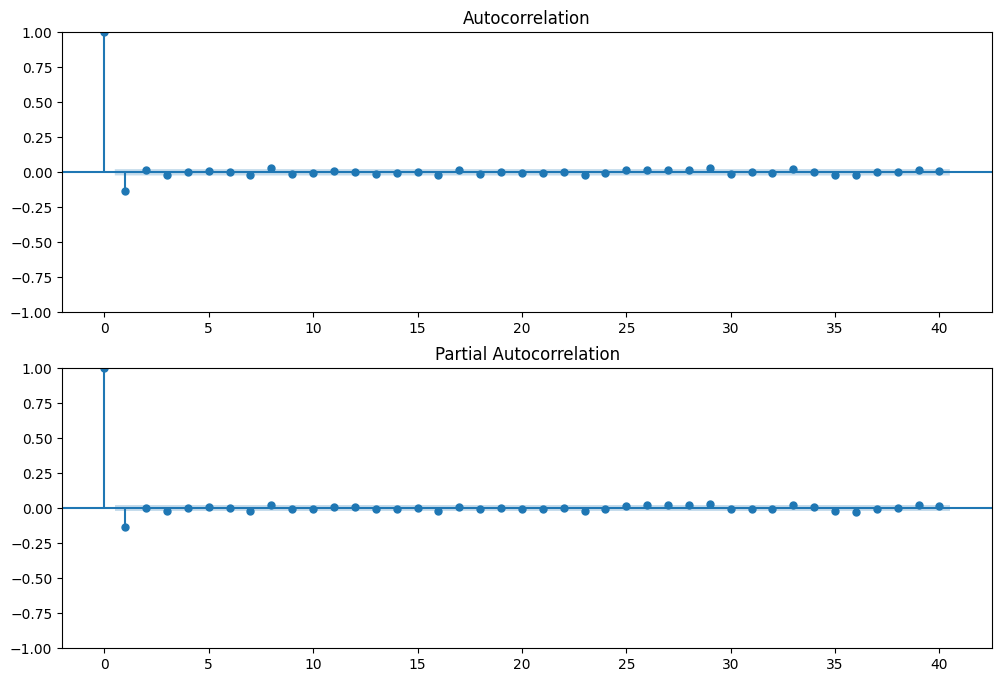

In [22]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12, 8))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(exchange_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(exchange_diff.dropna(), lags=40, ax=ax2)
plt.show()

### Fit ARIMA Model
- (p=1, d=1, q=1)

In [24]:
from statsmodels.tsa.arima.model import ARIMA

train_size=int(len(exchange_rate)* 0.8)
train =exchange_rate['Ex_rate'][:train_size]
test=exchange_rate['Ex_rate'][train_size:]

arima_model=ARIMA(train, order=(1, 1, 1))
arima_model_fit=arima_model.fit()

arima_summary=arima_model_fit.summary()

C:\Users\bilad\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bilad\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bilad\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:

print('AIC', arima_model_fit.aic)
print('BIC', arima_model_fit.bic)


AIC -45432.091583259054
BIC -45411.95873588155


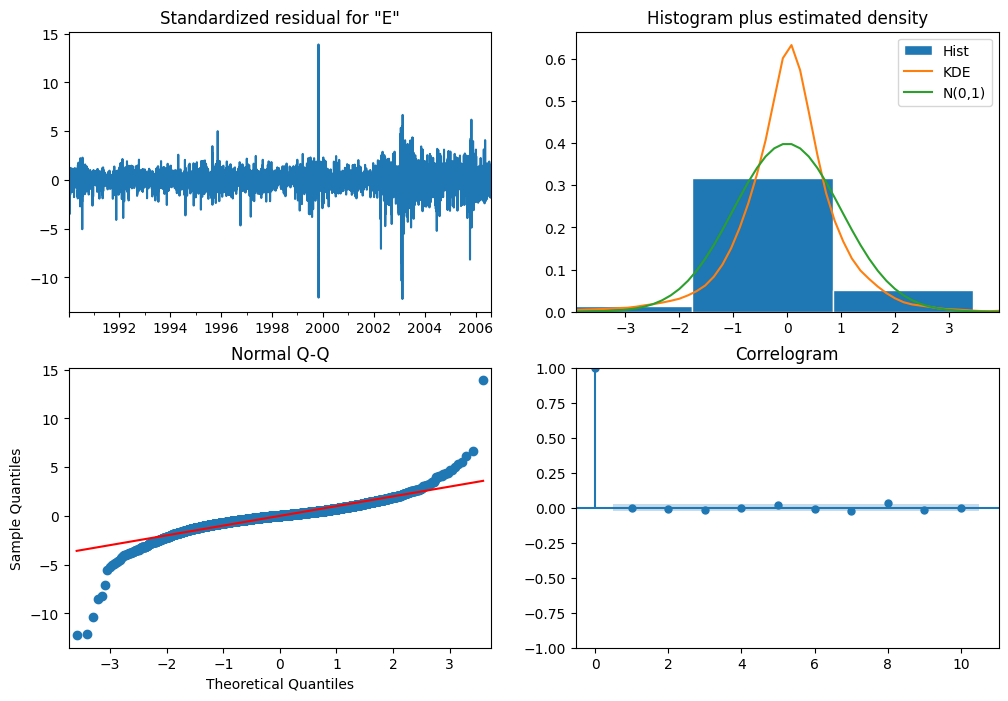

In [26]:
#Diagnostic Checking
arima_model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

- Residuals are centered around Zero, but shows significant spikes 
- Residuals approximately deviates from normal distribution.
- Q-Q plot points align with theoretical normal distribution line
- No autocorelation in residuals.

### Arima Forecasting

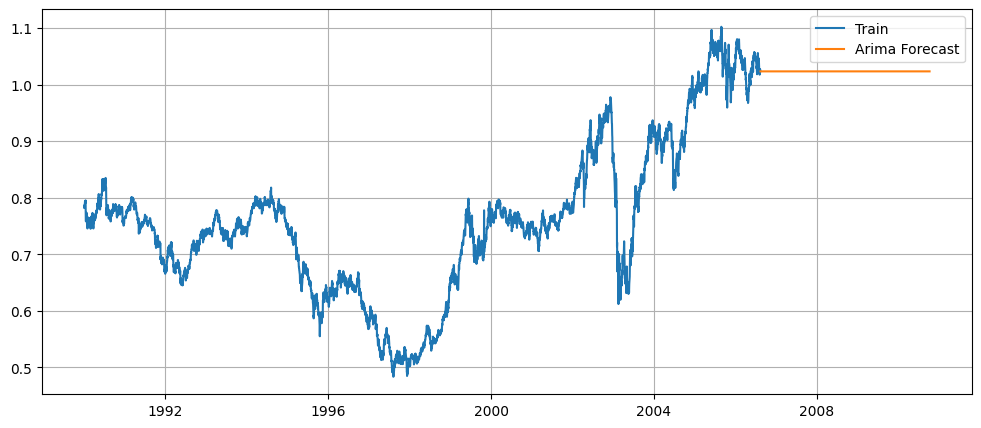

In [29]:
arima_forecast=arima_model_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, arima_forecast, label='Arima Forecast' )
plt.legend()
plt.grid()
plt.show()

### Exponential Smooting Model

In [31]:
#Model Fitting (Holt's Linear Trend)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ets_model =ExponentialSmoothing(
    train, trend='add', seasonal=None
)

ets_fit =ets_model.fit()
ets_forecast= ets_fit.forecast(len(test))

C:\Users\bilad\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


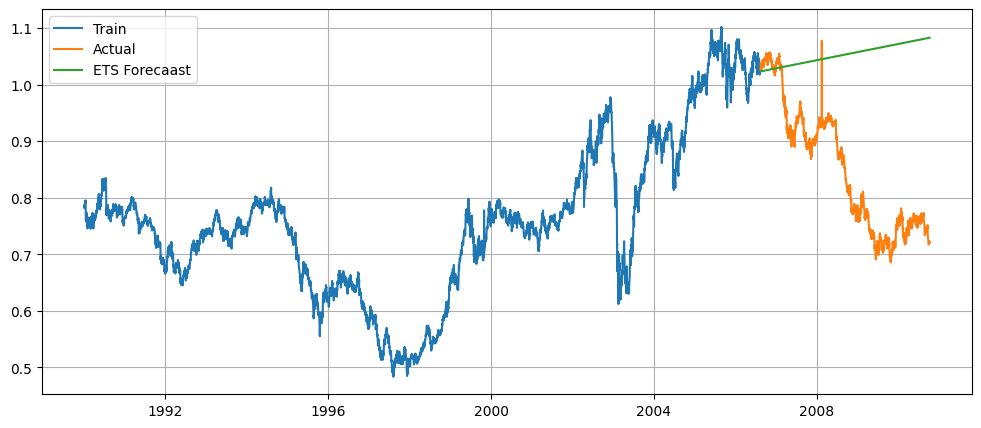

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, ets_forecast, label='ETS Forecaast')
plt.legend()
plt.grid()
plt.show()

### Model Evalution and Comparison

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse=np.sqrt(mean_squared_error(actual, predicted))
    mape=np.mean(np.abs((actual - predicted)/ actual)) * 100
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape=evaluate_model(test, arima_forecast)
ets_mae, ets_rmse, ets_mape=evaluate_model=evaluate_model(test, ets_forecast)

print('ARIMA -> MAE:', arima_mae, 'RMSE:', arima_rmse, 'MAPE:', arima_mape)
print('ETS -> MAE:', ets_mae, 'RMSE:', ets_rmse, 'MAPE:', ets_mape)

ARIMA -> MAE: 0.17770970449120707 RMSE: 0.20543669659668565 MAPE: 22.79796617381075
ETS -> MAE: 0.20659619049174635 RMSE: 0.2391044308614371 MAPE: 26.508663715455192


#### Model Comparison
- ARIMA tracks historical patterns more closely and adapts better to volatility
- It adapts better to short-term fluctuations and turning points.
- ETS produces an overly smooth forecast and fails to capture the sharp downward movement seen in actual exchange rates.
- Error metrics indicate lower MAE and RMSE for ARIMA than ETS.
- This confirms that ARIMA provides more accurate and reliable forecasts for this dataset.

#### Conclusion
ARIMA outperforms Exponential Smoothing for this dataset. Due to its ability to handle non-stationarity and short-term fluctuations, ARIMA is more suitable for exchange rate forecasting.